In [8]:
import pandas as pd
import numpy as np

df_baseline = pd.read_csv('data/Query2.csv')

df_baseline['io'] = df_baseline['fluid'] - df_baseline['urine']

df_baseline = df_baseline[df_baseline.urine<20000]
df_baseline = df_baseline[df_baseline.fluid<30000]

df_baseline.head()

,outcome_flag,gender,age,losstime,t1value,delta,urine,fluid,io
0,False,M,48,21.782222,10.8,-0.273333,2958.833333,13.666667,-2945.166666
1,True,F,82,17.046667,11.0,-0.251944,1329.006944,2191.916667,862.909723
2,False,M,64,10.802778,9.6,0.416111,1716.458333,310.002778,-1406.455555
3,True,M,67,6.061944,12.8,0.926667,5754.600000,4375.411111,-1379.188889
4,False,M,74,4.359722,10.4,3.541667,2443.750000,467.500000,-1976.250000


(array([3.800e+01, 2.220e+02, 1.049e+03, 4.446e+03, 2.830e+03, 5.150e+02,
        1.540e+02, 4.100e+01, 9.000e+00, 4.000e+00]),
 array([-19165.8888867 , -14354.28048381,  -9542.67208092,  -4731.06367803,
            80.54472486,   4892.15312775,   9703.76153064,  14515.36993353,
         19326.97833642,  24138.58673931,  28950.1951422 ]),
 <a list of 10 Patch objects>)

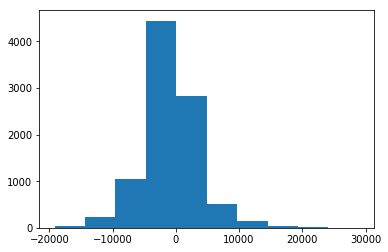

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.hist(df_baseline['io'])

In [13]:
df = df_baseline
df = df.dropna()

from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
X = df[['io']].values
 
# 目的変数に "alcohol (アルコール度数)" を利用
y = df['delta'].values
 
# 予測モデルを作成
clf.fit(X, y)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, y))

df['adjdhb'] = y - clf.predict(X)

df.to_csv('data/residual.csv', encoding='utf_8_sig', index=False)

[-8.19921587e-05]
-0.9729641610511592
0.028625883793585216


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


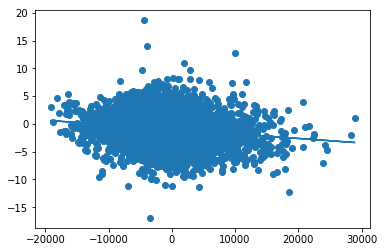

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, clf.predict(X))